# <u><b>Install Libraries:</b></u>

In [1]:
# %pip install pycryptodome

---
---
# <u><b>Final Examination:</b> Broadband Communication Systems (636270a-01)</u>



<b><u>Student Information:</u></b>

| <i><b>Field</b></i>       | <i><b>Information</i></b>                           |
| --------------------------| --------------------------------------------------- |
| _Name_                    | <b>`Raihan Bin Mofidul`</b>                         |
| _Role_                    | PhD Student \| Electronics Engineering              |
| _Position_                | Research Assistant \| Wireless Communication and Artificial Intelligence Lab |
| _Institution_             | Kookmin University, Seoul, Korea                    |
| _Student ID_              | <b>`D2023721`</b>                                   |


<b><u>Course Information:</u></b>

| <i><b>Field</b></i>       | <i><b>Information</b></i>                           |
| --------------------------| --------------------------------------------------- |
| _Course Title_            | Broadband Communication Systems                     |
| _Course No._              | 636270a-01                                          |
| _Credit/Hours_            | 3.0 / 3.0                                           |
| _College_                 | Graduate School                                     |
| _Department_              | Department of Electronics Engineering               |


<b><u>Course Instructor:</u></b>

| <i><b>Field</b></i>       | <i><b>Information</b></i>                           |
| --------------------------| --------------------------------------------------- |
| _Name_                    | `Prof. Youngil Park`                                |
| _Phone_                   | 02-910-4720                                         |
| _Office_                  | Room 14, 7th floor, Mirae Hall                      |
| _E-mail_                  | ypark@kookmin.ac.kr                                 |

---

© 2023 Raihan Bin Mofidul. All rights reserved. Unauthorized copying, modification, distribution, or use of this work is prohibited.

---

## __1(b)__ <u>CRC Calculation during Transmission</u>

> __<u>Scenario Description</u>__
>> - **Protocol:** CAN 2.0A
>> - **Message ID:** `0x253`
>> - **Message Data:** `0x83D4`
>> - **Task:** Calculate the CRC for the given message and ID.
>> - **Transmission Frame Calculation:**
>>> - **SOF (Start of Frame):** `0` (1 bit)
>>> - **Identifier:** `1001010011` (11 bits, standard format for CAN 2.0A, derived from `0x253`)
>>> - **RTR (Remote Transmission Request):** `0` (1 bit, indicating data frame)
>>> - **Control Field:** `00010` (6 bits, includes 1-bit IDE, 1 reserved bit, and 4-bit DLC representing the data length code for 2 bytes)
>>> - **Data:** `10000011110100` (16 bits, derived from `0x83D4`)
>>> - **Complete [SOF\~Data]:** `0 1001010011 0 00010 10000011110100`

> __<u>Overview</u>__
>> - **Module:** `crc_functions` (Raihan)
>> - **Package:** `utils_rbm`
>> - **Key Functions:** `calculate_crc` (CRC calculation), `binary_to_hex` (format conversion)

> __<u>CRC Polynomial (CAN 2.0A Standard)</u>__
>> - **Binary:** `110001010001101`
>> - **Equation:** x^15 + x^14 + x^10 + x^8 + x^7 + x^4 + x^3 + 1

> __<u>Transmission Frame Data</u>__
>> - **Binary Format:** `01001010011000001010000011110100` (excludes CRC)
>> - **Note:** This frame is constructed from the given Message ID and Data, excluding the CRC field.

> __<u>CRC Calculation Process</u>__
>> - **Function:** `calculate_crc`
>> - **Inputs:** Frame data, polynomial
>> - **Output:** CRC (binary)

> __<u>CRC Format Conversion</u>__
>> - **Function:** `binary_to_hex`
>> - **Input/Output:** CRC (binary to hex)

> __<u>Results</u>__
>> - **Display:** CRC in binary and hex formats
>> - **Purpose:** Verification and format-specific applications


In [2]:
# Importing necessary functions from the crc_functions module
from utils_rbm.crc_functions import calculate_crc, binary_to_hex

# Define the CRC polynomial for CAN 2.0A standard.
crc_polynomial = '110001010001101'

# Define the transmission frame data (SOF to Data) in binary format.
transmission_frame = '01001010011000001010000011110100'

# Calculate the CRC based on the transmission frame and the CRC polynomial.
crc_binary = calculate_crc(transmission_frame, crc_polynomial)

# Convert the binary CRC to hexadecimal format for compact representation.
crc_hex = binary_to_hex(crc_binary)

# Append the CRC delimiter (0) to the padded CRC.
crc_with_delimiter = crc_binary + '0'

# Concatenate the transmission frame with the calculated CRC and delimiter to form the final transmitted frame (SOF to CRC).
final_transmitted_frame = transmission_frame + crc_with_delimiter

print('-------------------------------------------------------------------------------------------------------------')
# Print the original transmission frame (SOF to Data) in binary format.
print(f"Transmission Frame [SOF to Data] in Binary                   : {transmission_frame}")

# Print the calculated CRC in both binary and hexadecimal formats.
print(f"CRC calculated for Transmission Frame [SOF to Data] in Binary: {crc_binary}")
print(f"CRC calculated for Transmission Frame [SOF to Data] in Binary: {crc_hex}")
print('-------------------------------------------------------------------------------------------------------------')

# Print the final transmitted frame (SOF to CRC) in binary format.
print(f"Final Transmitted Frame [SOF to CRC]  in Binary              : {final_transmitted_frame}")

****************************************************************************************
* Copyright © 2023 Raihan Bin Mofidul. All rights reserved.                            *
* Unauthorized copying, modification, distribution, or use of this work is prohibited. *
****************************************************************************************

-------------------------------------------------------------------------------------------------------------
Transmission Frame [SOF to Data] in Binary                   : 01001010011000001010000011110100
CRC calculated for Transmission Frame [SOF to Data] in Binary: 001001101011010
CRC calculated for Transmission Frame [SOF to Data] in Binary: 0x135a
-------------------------------------------------------------------------------------------------------------
Final Transmitted Frame [SOF to CRC]  in Binary              : 010010100110000010100000111101000010011010110100


## __1(c)__ <u>CRC Verification at Receiver Side</u>

> __<u>Task Description</u>__
>> - **Objective:** Calculate the CRC at the receiver side using the transmitted `[SOF~CRC]`.
>> - **Goal:** Verify the integrity of the received data by comparing the calculated CRC with the expected residue.

> __<u>Implementation Details</u>__
>> - **Module:** `crc_functions` (developed by Raihan)
>> - **Package:** `utils_rbm`
>> - **Functions Used:** `calculate_crc` (CRC calculation), `binary_to_hex` (format conversion)

> __<u>CRC Polynomial (CAN 2.0A Standard)</u>__
>> - **Polynomial:** `110001010001101` (binary)
>> - **Represents:** x^15 + x^14 + x^10 + x^8 + x^7 + x^4 + x^3 + 1

> __<u>Received Data</u>__
>> - **CRC Received:** `001001101011010`
>> - **Received Frame:** `010010100110000010100000111101000010011010110100` (SOF to CRC)

> __<u>CRC Calculation at Receiver</u>__
>> - **Process:** Calculate CRC for the received frame
>> - **Inputs:** Received frame, CRC polynomial
>> - **Outputs:** CRC (binary and hex)

> __<u>Results and Verification</u>__
>> - **Calculated CRC:** Displayed in binary and hex formats
>> - **Expected Residue:** `000000000000000` (15 zeros for a 15-bit CRC)
>> - **Verification:** Compare calculated CRC with expected residue
>> - **Outcome:** Determine if CRC check passed (no errors) or failed (errors detected)

In [3]:
# Importing necessary functions for CRC calculation and binary-to-hex conversion
from utils_rbm.crc_functions import calculate_crc, binary_to_hex

# Define the entire received frame including Start of Frame (SOF), data, and CRC
received_frame = '010010100110000010100000111101000010011010110100'

# Define the CRC polynomial for CAN 2.0A standard in binary format
crc_polynomial = '110001010001101'

# Calculate CRC based on the evaluation frame and polynomial
# Pad the CRC to 15 bits in case it is shorter
calculated_crc = calculate_crc(received_frame, crc_polynomial).zfill(15)

# Convert the calculated CRC from binary to hexadecimal format
crc_hex = binary_to_hex(calculated_crc)

# Print details of the received frame
print(f"Received Frame [SOF to CRC] in Binary          : {received_frame}")
print('-------------------------------------------------------------------------------------------------')

# Print the calculated CRC in both binary and hexadecimal formats
print(f"Calculated CRC at the receiver side in Binary  : {calculated_crc}")
print(f"Calculated CRC at the receiver side in Hex     : {crc_hex}")

# Define the expected CRC residue (typically a string of zeros for error-free transmission)
expected_residue = '000000000000000'  # 15 zeros for a 15-bit CRC

# Check if the calculated CRC matches the expected residue and print the result
if calculated_crc == expected_residue:
    print("CRC check passed                               : No errors detected.")
else:
    print("CRC check failed                               : Errors detected.")

****************************************************************************************
* Copyright © 2023 Raihan Bin Mofidul. All rights reserved.                            *
* Unauthorized copying, modification, distribution, or use of this work is prohibited. *
****************************************************************************************

Received Frame [SOF to CRC] in Binary          : 010010100110000010100000111101000010011010110100
-------------------------------------------------------------------------------------------------
Calculated CRC at the receiver side in Binary  : 000000000000000
Calculated CRC at the receiver side in Hex     : 0x0
CRC check passed                               : No errors detected.


## __1(d)__ <u>Determining Hamming Distance with and without Error Injection</u>

> __<u>Overview</u>__
>> - **Module:** `crc_functions` (developed by Raihan)
>> - **Package:** `utils_rbm`
>> - **Function Used:** `analyze_errors`
>> - **Purpose:** To analyze the impact of errors on Hamming distance in a transmission frame.

> __<u>Tansmitted [SOF~CRC] Frame</u>__
>> - **Transmission [SOF~CRC] Frame:** `010010100110000010100000111101000010011010110100`
>> - **CRC Polynomial:** `110001010001101` for CAN 2.0A standard (binary representation)

> __<u>Error Analysis</u>__
>> - **Error Positions:** [1, 5, 10, 15, 20, 25, 30]
>> - **Task:** Inject errors at specified positions and analyze the resulting Hamming distances.

> __<u>Hamming Distance Calculation Method</u>__
>> - **Definition:** Hamming distance measures the number of differing bits between two binary strings of equal length.
>> - **Calculation:** 
>>> - For two strings $a$ and $b$, the Hamming distance $H(a, b)$ is calculated as:
>>> - $H(a, b) = \sum_{i=0}^{\text{len}(a)-1} [a_i \neq b_i]$
>>> - Where $[a_i \neq b_i]$ is an indicator function, equal to 1 if $a_i \neq b_i$ and 0 otherwise.
>> - **Implementation:** In the `analyze_errors` function, Hamming distance is calculated for each error-injected frame compared to the received CRC.

> __<u>Function Execution</u>__
>> - **Process:** Call `analyze_errors` with the transmission frame, CRC polynomial, received CRC, and error positions.
>> - **Objective:** Determine the effect of errors on the integrity of the transmitted data.

In [4]:
# Importing the analyze_errors function from the crc_functions module
from utils_rbm.crc_functions import analyze_errors

# Setting up transmission data and CRC polynomial for error analysis
transmitted_SOF_Data_original   = "01001010011000001010000011110100"
crc_polynomial                  = "110001010001101"

# Specifying positions in the transmission frame to introduce errors
error_positions                 = [1, 5, 10, 15, 20, 25, 30]

# Executing the error analysis function to study the impact on Hamming distance
analyze_errors(transmitted_SOF_Data_original, crc_polynomial, error_positions)

****************************************************************************************
* Copyright © 2023 Raihan Bin Mofidul. All rights reserved.                            *
* Unauthorized copying, modification, distribution, or use of this work is prohibited. *
****************************************************************************************

Hamming Distance with and without Error Injection:
| Error Position | Error Injected | Transmitted Frame [SOF~Data]     | Calculated [CRC] | Hamming Distance |
|----------------|----------------|----------------------------------|------------------|------------------|
| [Original] N/A | No             | 01001010011000001010000011110100 | 001001101011010  |                0 |
|----------------|----------------|----------------------------------|------------------|------------------|
|              1 | Yes            | 00001010011000001010000011110100 | 010110110111001  |               10 |
|              5 | Yes            | 01001110011

In [5]:
# Define the cycle period and idle time
cycle_period = 500  # microseconds
idle_time = 10  # microseconds

# Define the packet lengths for regular and priority packets
regular_packet_lengths = {
    "A": 100,  # microseconds
    "B": 100,  # microseconds
    "C": 150,  # microseconds
    "D": 150,  # microseconds
}

priority_packet_lengths = {
    "A": 80,  # microseconds
    "B": 80,  # microseconds
    "C": 60,  # microseconds
    "D": 60,  # microseconds
}

# Calculate the remaining time after accounting for idle time
remaining_time = cycle_period - idle_time

# Define a function to calculate the maximum number of packets that can fit in a segment
def calculate_max_packets(segment_time, packet_lengths):
    max_packets = 0
    for node, packet_length in packet_lengths.items():
        max_packets += int(segment_time / packet_length)
    return max_packets

# Define a function to construct a segment
def construct_segment(segment_time, packet_lengths):
    segment = []
    remaining_time = segment_time
    while remaining_time > 0:
        # Find the node with the shortest remaining packet length
        shortest_node = min(packet_lengths.items(), key=lambda item: item[1])

        # Add the packet to the segment
        segment.append(shortest_node[0])

        # Update the remaining time and packet length
        remaining_time -= shortest_node[1]
        packet_lengths[shortest_node[0]] += regular_packet_lengths[shortest_node[0]]

    return segment

# Construct the static segment
static_segment_time = remaining_time // 2
static_segment = construct_segment(static_segment_time, regular_packet_lengths.copy())

# Construct the dynamic segment
dynamic_segment_time = remaining_time - static_segment_time
dynamic_segment = construct_segment(dynamic_segment_time, priority_packet_lengths.copy())

# Print the constructed segments
print("Static Segment:", static_segment)
print("Dynamic Segment:", dynamic_segment)

Static Segment: ['A', 'B', 'C']
Dynamic Segment: ['C', 'D', 'A', 'B']


## __4(b)__ <u>Signal waveform by using 3B2T symbol mapping of 100Base-T1:</u>

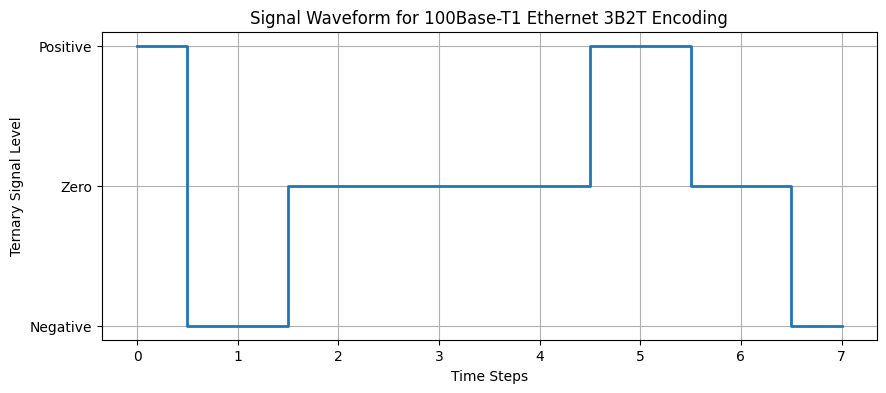

In [6]:
import matplotlib.pyplot as plt

# Hypothetical 3B2T mapping table
binary_to_ternary_mapping = {
    '000': (-1, -1),
    '001': (-1, 0),
    '010': (-1, 1),
    '011': (0, -1),
    '100': (0, 0),
    '101': (0, 1),
    '110': (1, -1),
    '111': (1, 0)
}

# Data sequence to be encoded
data_sequence = "1101 0010 1011".replace(" ", "")

# Splitting the data sequence into groups of 3 binary digits
binary_groups = [data_sequence[i:i+3] for i in range(0, len(data_sequence), 3)]

# Mapping each group to its ternary equivalent
ternary_sequence = [binary_to_ternary_mapping[group] for group in binary_groups]

# Flattening the list of tuples into a single list
flattened_ternary_sequence = [val for pair in ternary_sequence for val in pair]

# Create a signal waveform from the ternary sequence
time_steps = range(len(flattened_ternary_sequence))

plt.figure(figsize=(10, 4))
plt.step(time_steps, flattened_ternary_sequence, where='mid', linewidth=2)
plt.title('Signal Waveform for 100Base-T1 Ethernet 3B2T Encoding')
plt.xlabel('Time Steps')
plt.ylabel('Ternary Signal Level')
plt.xticks(time_steps)
plt.yticks([-1, 0, 1], ['Negative', 'Zero', 'Positive'])
plt.grid(True)

# Show the plot
plt.show()

## __6__ <u>Secure OTA software update system be implemented in connected vehicles</u>

In [7]:
from Crypto.PublicKey import RSA
from Crypto.Cipher import PKCS1_OAEP
import binascii
from PIL import Image
import io

# Step 1: RSA Encryption
def generate_rsa_keys():
    new_key = RSA.generate(2048)
    public_key = new_key.publickey().exportKey("PEM")
    private_key = new_key.exportKey("PEM")
    return public_key, private_key

def rsa_encrypt(public_key, message):
    try:
        rsa_public_key = RSA.importKey(public_key)
        rsa_public_key = PKCS1_OAEP.new(rsa_public_key)
        encrypted_message = rsa_public_key.encrypt(message)
        return binascii.hexlify(encrypted_message)
    except Exception as e:
        return str(e)

def rsa_decrypt(private_key, encrypted_message):
    try:
        rsa_private_key = RSA.importKey(private_key)
        rsa_private_key = PKCS1_OAEP.new(rsa_private_key)
        decrypted_message = rsa_private_key.decrypt(binascii.unhexlify(encrypted_message))
        return decrypted_message
    except Exception as e:
        return str(e)

software_file = b"This is the software update for the car."

public_key, private_key = generate_rsa_keys()
encrypted_software = rsa_encrypt(public_key, software_file)

# Convert encrypted software from hex to bytes
encrypted_software_bytes = binascii.unhexlify(encrypted_software)

# Step 2: Steganography
def hide_data_in_image(image_path, data):
    image = Image.open(image_path)
    encoded_image = image.copy()
    width, height = image.size
    index = 0

    binary_data = ''.join(format(byte, '08b') for byte in data)
    data_len = len(binary_data)

    for x in range(width):
        for y in range(height):
            pixel = list(image.getpixel((x, y)))
            for n in range(0, 3):
                if index < data_len:
                    pixel[n] = pixel[n] & ~1 | int(binary_data[index])
                    index += 1
                else:
                    break
            encoded_image.putpixel((x, y), tuple(pixel))
            if index >= data_len:
                break
        if index >= data_len:
            break
    return encoded_image

def reveal_data_in_image(image_path):
    image = Image.open(image_path)
    binary_data = ""
    for x in range(image.size[0]):
        for y in range(image.size[1]):
            pixel = list(image.getpixel((x, y)))
            for n in range(0, 3):
                binary_data += str(pixel[n] & 1)
    all_bytes = [binary_data[i: i+8] for i in range(0, len(binary_data), 8)]
    # Truncate the binary data to match the length of the original encrypted data
    truncated_data = all_bytes[:len(encrypted_software_bytes)]
    decoded_data = bytes([int(byte, 2) for byte in truncated_data])
    return decoded_data

# Create a blank image for demonstration purposes
blank_image = Image.new('RGB', (600, 600), color = 'skyblue')
blank_image_path = 'blank_image.png'
blank_image.save(blank_image_path)

# Hide the encrypted software in the blank image
stego_image = hide_data_in_image(blank_image_path, encrypted_software_bytes)
stego_image_path = 'stego_image.png'
stego_image.save(stego_image_path)

# Reveal the data in the image
revealed_encrypted_data = reveal_data_in_image(stego_image_path)

# Check if the revealed data matches the original encrypted data
is_data_correct = revealed_encrypted_data == encrypted_software_bytes

# Returning the paths for the images and the result of the data integrity check
blank_image_path, stego_image_path, is_data_correct

('blank_image.png', 'stego_image.png', True)

In [8]:
from Crypto.PublicKey import RSA
from Crypto.Cipher import PKCS1_OAEP
import binascii
from PIL import Image
import io

# RSA Encryption and Decryption Functions
def generate_rsa_keys():
    new_key = RSA.generate(2048)
    public_key = new_key.publickey().exportKey("PEM")
    private_key = new_key.exportKey("PEM")
    return public_key, private_key

def rsa_encrypt(public_key, message):
    rsa_public_key = RSA.importKey(public_key)
    rsa_public_key = PKCS1_OAEP.new(rsa_public_key)
    encrypted_message = rsa_public_key.encrypt(message)
    return binascii.hexlify(encrypted_message)

def rsa_decrypt(private_key, encrypted_message):
    rsa_private_key = RSA.importKey(private_key)
    rsa_private_key = PKCS1_OAEP.new(rsa_private_key)
    decrypted_message = rsa_private_key.decrypt(binascii.unhexlify(encrypted_message))
    return decrypted_message

# Steganography Functions
def hide_data_in_image(image, data, output_path):
    encoded_image = image.copy()
    width, height = image.size
    index = 0

    binary_data = ''.join(format(byte, '08b') for byte in data)
    data_len = len(binary_data)

    for x in range(width):
        for y in range(height):
            pixel = list(image.getpixel((x, y)))
            for n in range(0, 3):
                if index < data_len:
                    pixel[n] = pixel[n] & ~1 | int(binary_data[index])
                    index += 1
                else:
                    break
            encoded_image.putpixel((x, y), tuple(pixel))
            if index >= data_len:
                break
        if index >= data_len:
            break

    encoded_image.save(output_path)
    return output_path

def reveal_data_in_image(image_path, expected_data_length):
    image = Image.open(image_path)
    binary_data = ""
    for x in range(image.size[0]):
        for y in range(image.size[1]):
            pixel = list(image.getpixel((x, y)))
            for n in range(0, 3):
                if len(binary_data) < expected_data_length * 8:
                    binary_data += str(pixel[n] & 1)
                else:
                    break
            if len(binary_data) >= expected_data_length * 8:
                break
        if len(binary_data) >= expected_data_length * 8:
            break

    all_bytes = [binary_data[i: i+8] for i in range(0, len(binary_data), 8)]
    decoded_data = bytes([int(byte, 2) for byte in all_bytes])
    return decoded_data

# Main Execution
software_file = b"This is the software update for the car."
public_key, private_key = generate_rsa_keys()

encrypted_software = rsa_encrypt(public_key, software_file)
encrypted_software_bytes = binascii.unhexlify(encrypted_software)

blank_image = Image.new('RGB', (600, 600), color = 'skyblue')
stego_image_path = 'stego_image.png'
hide_data_in_image(blank_image, encrypted_software_bytes, stego_image_path)

encrypted_data_length = len(encrypted_software_bytes)
revealed_encrypted_data = reveal_data_in_image(stego_image_path, encrypted_data_length)

decrypted_revealed_data = rsa_decrypt(private_key, binascii.hexlify(revealed_encrypted_data))
decryption_success = decrypted_revealed_data == software_file
decrypted_message = decrypted_revealed_data.decode() if decryption_success else "Decryption failed"

# Output
stego_image_path, decryption_success, decrypted_message

('stego_image.png', True, 'This is the software update for the car.')